In [1]:
import numpy as np

In [2]:
import problem1 as mz

In [3]:
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)

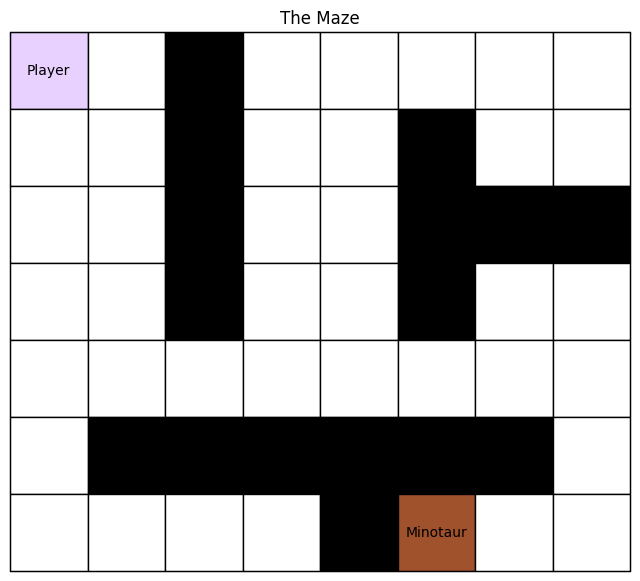

In [4]:
mz.draw_maze(maze_mat, start_pos, minotaur_pos)

## Task (a) MDP formulation

We propose the following tuple MDP formulation: 

#### State space $\mathcal{S}$
We would need to model the state space with each state as a tuple. Note that we exclude the obstacles' position for player since these are impossible states to be in for the player. Formally, the state space is

$$\mathcal{S} = \big\lbrace (i_p,j_p),(i_m,j_m):\textrm{such that the cell
} (i_p,j_p) \textrm{ is not in the wall}\big\rbrace.$$
With $(i_p,j_p)$ represents the position of the player and the $(i_m,j_m)$ represents the position of the minotaur.

#### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`) and the minotaur moves randomlly to `left`, `right`, `down`, `up` without possible to control.
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$ 
- There is no explicit action space for the Minotaur since its movements are not under our control.

#### Transition probabilities $\mathcal{P}$
Note that there is no randomness involved upon taking an action by the player. Since the minotaur can not stay and will always move. the Transition probabilities are,  

- If at state $s(0)$ taking action  $a$ does not lead the player to a wall or an obstacle but to another state (or position) $s'$, then $\mathbb{P}(s(0)',s(1)') \vert (s(0),s(1)), a) = 1$. 
- If at state $s(0)$ taking action  $a$ leads the player to a wall or an obstacle, the player remains in his state (or position) $s$, then $\mathbb{P}(s(0),s(1)') \vert (s(0),s(1)), a) = 1$.
- Remember: $S=((i_p,j_p),(i_m,j_m))$ So $s(0)=(i_p,j_p)$ represents player's posiiton and $s(1)$ represents minotaur's position.



#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads the player to a wall or $(i_p,j_p)=(i_m,j_m)$  then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads the player to some other position in the maze that is not the exit nor a wall, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads the player to the exit then $r(s ,a) = 0$.  

## Task (b) Alternating round

#### State space $\mathcal{S}$
Same as in task (a).

#### Action space $\mathcal{A}$
Same as in task (a).

#### Transition probabilities $\mathcal{P}$
Assume that for $T=0,2,4,...,x$ is player's round, and $T=1,3,5,...,2x+1$ is minotaur's round.
- player's round: If at state $s(0)$ taking action  $a$ does not lead the player to a wall or an obstacle but to another state (or position) $s'$, then $\mathbb{P}(s(0)',s(1)) \vert (s(0),s(1)), a) = 1$. 
- player's round: If at state $s(0)$ taking action  $a$ leads the player to a wall or an obstacle, the player remains in his state (or position) $s$, then $\mathbb{P}(s(0),s(1)) \vert (s(0),s(1)), a) = 1$.
- minotaur's round: $\mathbb{P}(s(0),s(1)') \vert (s(0),s(1)), a) = 1$.

#### Rewards $\mathcal{R}$
Same as in task (a).

#### Analyse
Since the player observes the Minotaur's position before making a move, the player can make informed decisions based on the Minotaur's current location. 
So I believe that the Minotaur will less likely to catch the player if they are not moving simultaneously.


## Task (c) Dynamic Programming

In [5]:
# Create an environment maze
env = mz.Maze(maze_mat)
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);